After all, the fundamental reason we build predictive machine learning models is typically to model what would happen under a particular set of circumstances which have either not yet occurred or have occurred but for which we do not know the actual result.

	Hyperparameter tuning?
	Should I do BOTH data_with_paymentcols and data_without_paymentcols?
	Look at feature importances:
        barchart for top x features or all features with coefficient > y. 
        How can I find the p-value for features? Is that only in regression?
	Do Ridge Regression and Lasso Regression.
		Barchart for top features
	Make DataFrame with top features for my model, Lasso Regression, and Ridge Regression (or model and Ridge)
	Make inferences: 
		Does race show up in these features? Where?
		How do I interpret differences in RATES distinct from differences in CHARGES? A city doctor should CHARGE more, but should his rate b higher?
        Or should a rural (lowpop) doctor have higher rates bc he might charge less?
        Or might city doctors be cheap Public Health providers /Flu shots, thus paid in full?

    Look at extreme mistakes:
    Providers marked low but actually v high. Providers marked v high but actually low: barcharts of types of providers, racial majority, regions, subregions, histogram of submitted charges OR medicare payments, histogram of payment/service, histogram of payment/person. Boxplots of percent black / white / hispanic / asian for false very-highs and for false-lows



# Importing Modules and Checking Directory 

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pd.__version__

'1.1.5'

In [3]:
os.getcwd()


'/Users/Livi/Projects/Black_mental_health/models'

In [4]:
X = pd.read_csv('../data/processed/feature_matrix_scaled_PT.csv', index_col=0)
X.head()

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,number_of_hcpcs,number_of_services,total_beneficiaries,total_submitted_charges,avg_beneficiary_age,avg_hcc_risk_score,submitted_charges_per_person,services_per_person,submitted_charges_per_service,total_pop,...,subregion_Pacific,subregion_South Atlantic,subregion_West North Central,subregion_West South Central,majority_asian,majority_black,majority_hispanic,majority_native_amer,majority_white,no_majority
0,-0.003948,0.540055,0.851671,1.196155,0.998501,1.105662,0.871076,-0.119979,1.063762,0.781846,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,-0.225179,-0.234267,-0.033669,0.585053,-0.416918
1,-0.170174,0.576787,1.015528,0.573919,2.139463,0.994263,-0.276118,-0.317600,0.179416,-0.074416,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,-0.225179,-0.234267,-0.033669,0.585053,-0.416918
2,-1.402499,-1.478753,-2.032970,-2.079729,-1.181247,-1.398919,-1.041626,0.565058,-1.326987,-0.413310,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,4.440915,-0.234267,-0.033669,-1.709248,-0.416918
3,0.447350,1.158778,1.311877,1.152199,1.833739,-0.416924,0.242840,0.442297,0.106138,0.795532,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,-0.225179,-0.234267,-0.033669,-1.709248,2.398553
4,0.139490,-0.443103,-0.613947,-0.657554,-0.706375,1.649911,-0.268393,0.241994,-0.223406,-0.679061,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,-0.225179,-0.234267,-0.033669,-1.709248,2.398553


In [5]:
y = pd.read_csv('../data/processed/target_array_2.csv', index_col=0)
y.head()

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,payrate_level
0,high
1,high
2,very low
3,low
4,low


In [6]:
X.shape, y.shape

((1072142, 190), (1072142, 1))

    The best performing models in my Preprocessing step were SVM (only when data was scaled) and Logistic Regression (a little better performance also when data was scaled).
    I'll be including both of these in this Modeling notebook to compare the important features.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size = 0.2, random_state=2)

In [26]:
X_train.shape, y_train.shape

((857713, 190), (857713,))

In [18]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score


In [19]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(n_jobs=-1)

start = time.time()

rf.fit(X_train[:100000], y_train[:100000])

end= time.time()
total = end - start

print("Time:", total/60, "minutes")

Time: 0.570490316549937 minutes


In [20]:
start = time.time()

ypred_rf = rf.predict(X_test)

end = time.time()
print('Time:',(end-start)/60, 'minutes')

Time: 0.11450720230738322 minutes


RF F1 Score: 0.6203087205788654
Time: 0.17797584931055704 minutes


<Figure size 1440x1440 with 0 Axes>

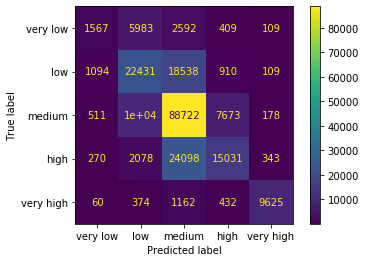

In [21]:
from sklearn.metrics import plot_confusion_matrix

start = time.time()

plt.figure(figsize=(20,20))
z = plot_confusion_matrix(rf, X_test, y_test, labels=['very low','low','medium','high','very high'])
#plt.savefig('confusion_matrix_RF.png')
f1_rf = f1_score(y_test, ypred_rf, average='weighted')

end=time.time()

print('RF F1 Score:', f1_rf)
print('Time:', (end-start)/60, 'minutes')
z

In [22]:
recall_rf = recall_score(y_test, ypred_rf, average='weighted')
precision_rf = precision_score(y_test, ypred_rf, average='weighted')

print('RF F1 Score:', f1_rf, 'RF Recall Score:', recall_rf, 'RF Precision Score:', precision_rf)

RF F1 Score: 0.6203087205788654 RF Recall Score: 0.6406596122725937 RF Precision Score: 0.6308437534256355


In [23]:
scores = pd.DataFrame({'models':['Random Forest'],
             'F1 Scores': [f1_rf],
             'Recall Scores': [recall_rf],
             'Precision Scores':[precision_rf]})
scores

,models,F1 Scores,Recall Scores,Precision Scores
0,Random Forest,0.620309,0.64066,0.630844


# Tuning

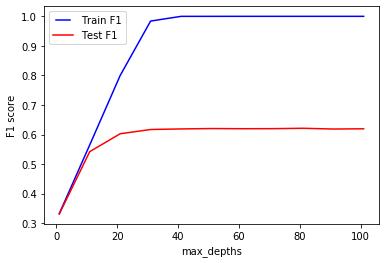

time: 9.47630048195521 minutes


In [58]:
from sklearn.metrics import f1_score
import time

start = time.time()

max_depths = np.arange(1, 111, 10)
x_train = X_train[:100000]
y_train = y_train[:100000]
x_test = X_test[:100000]
y_test = y_test[:100000]
train_results = []
test_results = []
for max_depth in max_depths:
    model = RandomForestClassifier(max_depth=max_depth)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    f1 = f1_score(y_train, train_pred, average = 'weighted')
    train_results.append(f1)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred,average = 'weighted')
    test_results.append(f1)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train F1')
line2, = plt.plot(max_depths, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('max_depths')
plt.show()

end =time.time()
print("time:", (end-start)/60, 'minutes')

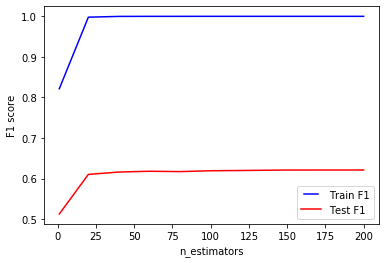

time: 8.373383716742199 minutes


In [59]:
start = time.time()

x_train = X_train[:100000]
y_train = y_train[:100000]
x_test = X_test[:100000]
y_test = y_test[:100000]

n_estimators = [1, 20, 40, 60, 80, 100, 120, 150, 200]
train_results = []
test_results = []
for n_estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=n_estimator)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    f1 = f1_score(y_train, train_pred,average = 'weighted')
    train_results.append(f1)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred,average = 'weighted')
    test_results.append(f1)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train F1')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('n_estimators')
plt.show()

end =time.time()
print("time:", (end-start)/60, 'minutes')

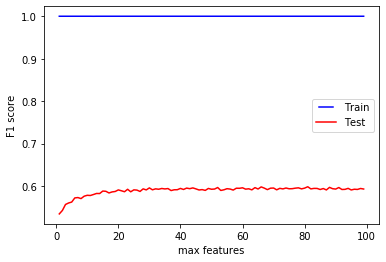

In [54]:
start = time.time()

x_train = X_train[:100000]
y_train = y_train[:100000]
x_test = X_test[:100000]
y_test = y_test[:100000]


max_features = list(range(1,100))
train_results = []
test_results = []
for max_feature in max_features:
    model = RandomForestClassifier(max_features=max_feature)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    f1 = f1_score(y_train, train_pred,average = 'weighted')
    train_results.append(f1)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred,average = 'weighted')
    test_results.append(f1)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train')
line2, = plt.plot(max_features, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('max features')
plt.show()

end = time.time()
print('time:', (end-start)/60, 'minutes')

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from timeit import default_timer as timer

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size = 0.2, random_state=2)

X_train = X_train[:10000]
y_train = y_train[:10000]
x_test = X_test[:10000]
y_test = y_test[:10000]


start = timer()
model = RandomForestClassifier()
max_depth = [10, 20, 30, 40, 50]
#criterion=['gini','entropy']
n_estimators = [20, 40, 60, 80, 100]
max_features= [5, 10, 15, 20, 25]
#class_weight=['balanced']

grid = dict(max_depth=max_depth, n_estimators=n_estimators, max_features=max_features)
scorer = make_scorer(f1_score, average = 'weighted')
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring=scorer)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

end = timer()
print("time:", (end - start)/60, 'minutes')

Best: 0.607461 using {'max_depth': 40, 'max_features': 25, 'n_estimators': 60}
time: 7.858538088433367 minutes


In [65]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

scores=[]
parameters=[]

for mean, stdev, param in zip(means, stds, params):
    scores.append(mean)
    parameters.append(param)
    
scores= np.array(scores)
params=np.array(params)
scores.argsort()[-10:]

ps = params[scores.argsort()[-10:]]
ss = scores[scores.argsort()[-10:]]

for p, s in zip(ps, ss):
    print(s, ':', p)

0.6037686825546906 : {'max_depth': 50, 'max_features': 25, 'n_estimators': 80}
0.603817502431791 : {'max_depth': 20, 'max_features': 20, 'n_estimators': 100}
0.6040638808428967 : {'max_depth': 40, 'max_features': 20, 'n_estimators': 60}
0.6044374170546003 : {'max_depth': 20, 'max_features': 25, 'n_estimators': 80}
0.6046059739407701 : {'max_depth': 30, 'max_features': 20, 'n_estimators': 60}
0.6047098487168999 : {'max_depth': 20, 'max_features': 25, 'n_estimators': 60}
0.6047139298353741 : {'max_depth': 40, 'max_features': 25, 'n_estimators': 100}
0.6064279497496242 : {'max_depth': 50, 'max_features': 25, 'n_estimators': 100}
0.6071253487862985 : {'max_depth': 40, 'max_features': 20, 'n_estimators': 80}
0.6074606126557285 : {'max_depth': 40, 'max_features': 25, 'n_estimators': 60}


##### Using suggested metrics

In [69]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size = 0.2, random_state=2)


rf_tune1 = RandomForestClassifier(n_jobs=-1, max_depth=40, max_features=2, n_estimators=60)

start = time.time()

rf_tune1.fit(X_train[:100000], y_train[:100000])
ypred_rf_tune1 = rf_tune1.predict(X_test)
f1_rf_tune1 = f1_score(y_test, ypred_rf_tune1, average='weighted')


end= time.time()
total = end - start

print('RF F1 Score:', f1_rf_tune1)
print("Time:", total/60, "minutes")

Time: 0.43638649384180705 minutes


In [72]:
#plt.figure(figsize=(20,20))
#z = plot_confusion_matrix(rf_tune1, X_test, y_test, labels=['very low','low','medium','high','very high'])
#plt.savefig('confusion_matrix_RF.png')
#z

RF F1 Score: 0.6229051185250478
Time: 0.04270068804423014 minutes


<Figure size 1440x1440 with 0 Axes>

In [73]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size = 0.2, random_state=2)


rf_tune2 = RandomForestClassifier(n_jobs=-1, max_depth=40, max_features=20, n_estimators=80)

start = time.time()

rf_tune2.fit(X_train[:100000], y_train[:100000])
ypred_rf_tune2 = rf_tune2.predict(X_test)
f1_rf_tune2 = f1_score(y_test, ypred_rf_tune2, average='weighted')

end= time.time()
total = end - start

print('RF F1 Score:', f1_rf_tune2)
print("Time:", total/60, "minutes")

RF F1 Score: 0.6222025840609103
Time: 0.6454835653305053 minutes


In [74]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size = 0.2, random_state=2)
rf_tune3 = RandomForestClassifier(n_jobs=-1, max_depth=50, max_features=25, n_estimators=100)
rf_tune3.fit(X_train[:100000], y_train[:100000])
ypred_rf_tune3 = rf_tune3.predict(X_test)
f1_rf_tune3 = f1_score(y_test, ypred_rf_tune3, average='weighted')

end= time.time()
total = end - start

print('RF F1 Score:', f1_rf_tune3)
print("Time:", total/60, "minutes")

RF F1 Score: 0.6238192652933058
Time: 1.0376463810602823 minutes


In [75]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size = 0.2, random_state=2)
rf_tune4 = RandomForestClassifier(n_jobs=-1, max_depth=40, max_features=25, n_estimators=100)
rf_tune4.fit(X_train[:100000], y_train[:100000])
ypred_rf_tune4 = rf_tune4.predict(X_test)
f1_rf_tune4 = f1_score(y_test, ypred_rf_tune4, average='weighted')

end= time.time()
total = end - start

print('RF F1 Score:', f1_rf_tune4)
print("Time:", total/60, "minutes")

RF F1 Score: 0.6241083908163775
Time: 1.1664363781611125 minutes


##### Using Randomized Search CV

In [86]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

start = time.time()

params = {'max_depth':randint(1,50),
         'max_features':randint(1,40),
          'n_estimators':randint(10,100),
         'criterion':['gini']}

rf = RandomForestClassifier()

scorer = make_scorer(f1_score, average = 'weighted')

randomized_rf = RandomizedSearchCV(rf, params, cv=5, scoring=scorer)

randomized_rf.fit(X_train[:100000], y_train[:100000])


end=time.time()
print('time:', (end-start)/60, 'minutes')
print('best params:', randomized_rf.best_params_)
print('best score:', randomized_rf.best_score_)

time: 19.99403643210729 minutes
best params: {'criterion': 'gini', 'max_depth': 40, 'max_features': 35, 'n_estimators': 80}
best score: 0.6219702043294586


In [91]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size = 0.2, random_state=2)
rf_tune5 = RandomForestClassifier(n_jobs=-1, max_depth=40, max_features=35, n_estimators=80)
rf_tune5.fit(X_train[:100000], y_train[:100000])
ypred_rf_tune5 = rf_tune5.predict(X_test)
f1_rf_tune5 = f1_score(y_test, ypred_rf_tune5, average='weighted')

end= time.time()
total = end - start

print('RF F1 Score:', f1_rf_tune5)
print("Time:", total/60, "minutes")

RF F1 Score: 0.6235888024216302
Time: 1.06476598183314 minutes


Saving Model Metrics Table

In [193]:
import dataframe_image as dfi
dfi.export(scores,"model_metrics.png")

In [194]:
scores.to_csv('../reports/figures/model_scores.csv')

Saving Feature Importances RF

In [203]:
rf_imp = pd.DataFrame({'Features': X.columns, 
              'RF Feature Importances': [format(i, '8f') for i in rf.feature_importances_]}
            ).sort_values('RF Feature Importances', ascending=False).head(20)
rf_imp.to_csv('../references/rf_feature_imp.csv')

In [346]:
rf_imp.head(20)

,Features,RF Feature Importances
8,submitted_charges_per_service,0.166715
6,submitted_charges_per_person,0.082571
7,services_per_person,0.077495
3,total_submitted_charges,0.052601
0,number_of_hcpcs,0.043647
1,number_of_services,0.043515
5,avg_hcc_risk_score,0.039671
2,total_beneficiaries,0.032824
4,avg_beneficiary_age,0.028493
15,percent_asian,0.024522


Saving Errors from Random Forest Models as a CSV. I want to see which doctors are mislabeled and project why?

In [38]:
idx = X_test.index
examine_errors = pd.read_csv('../data/interim/merged_medicare_before_dropping.csv',index_col=0).iloc[idx]
examine_errors = pd.concat([examine_errors.reset_index(drop=True),
                                   pd.Series(ypred_rf).rename('ypred_rf'),
                                   pd.Series(y_test).rename('ytest')], axis=1)

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Here I'm saving the most extreme errors.

In [46]:
import dataframe_image as dfi

falselow = examine_errors[
    (examine_errors.ypred_rf == 'very low') & (examine_errors.ytest == 'very high')]

falsehigh = examine_errors[
    (examine_errors.ypred_rf == 'very high') & (examine_errors.ytest == 'very low')]

falselow = falselow[['entity_code','state','provider_type','number_of_services','number_of_hcpcs','total_beneficiaries','total_submitted_charges','avg_hcc_risk_score','submitted_charges_per_person','services_per_person','submitted_charges_per_service','region','subregion','total_pop','majority','ytest','ypred_rf']]
falsehigh = falsehigh[['entity_code','state','provider_type','number_of_services','number_of_hcpcs','total_beneficiaries','total_submitted_charges','avg_hcc_risk_score','submitted_charges_per_person','services_per_person','submitted_charges_per_service','region','subregion','total_pop','majority','ytest','ypred_rf']]




falselow.shape, falsehigh.shape

((60, 17), (109, 17))

In [47]:
falselow.head()

,entity_code,state,provider_type,number_of_services,number_of_hcpcs,total_beneficiaries,total_submitted_charges,avg_hcc_risk_score,submitted_charges_per_person,services_per_person,submitted_charges_per_service,region,subregion,total_pop,majority,ytest,ypred_rf
3730,I,CA,Family Practice,102.0,8,26,4210.00,1.9780,161.92,3.92,41.27,West,Pacific,71422.0,no_majority,very high,very low
5546,I,FL,Nurse Practitioner,28.0,10,14,2860.00,0.6400,204.29,2.00,102.14,South,South Atlantic,21807.0,majority_white,very high,very low
22823,I,MS,Family Practice,366.0,12,114,12720.34,1.0595,111.58,3.21,34.76,South,East South Central,30050.0,majority_white,very high,very low
23207,I,WA,Family Practice,31.0,7,25,1711.00,1.1905,68.44,1.24,55.19,West,Pacific,43285.0,majority_white,very high,very low
23339,I,DE,Certified Nurse Midwife,38.0,6,28,2683.00,0.6956,95.82,1.36,70.61,South,South Atlantic,25134.0,majority_white,very high,very low


In [48]:
falsehigh.head()

,entity_code,state,provider_type,number_of_services,number_of_hcpcs,total_beneficiaries,total_submitted_charges,avg_hcc_risk_score,submitted_charges_per_person,services_per_person,submitted_charges_per_service,region,subregion,total_pop,majority,ytest,ypred_rf
558,I,MS,Nurse Practitioner,151.0,22,65,6362.00,1.2124,97.88,2.32,42.13,South,East South Central,14874.0,majority_white,very low,very high
1296,I,CA,Pediatric Medicine,46.0,7,38,1461.82,1.2552,38.47,1.21,31.78,West,Pacific,65016.0,majority_hispanic,very low,very high
1427,I,OH,Registered Dietitian or Nutrition Professional,78.0,3,49,6682.00,1.2227,136.37,1.59,85.67,Midwest,East North Central,27011.0,majority_white,very low,very high
2789,I,KY,Nurse Practitioner,310.0,32,119,7781.04,1.5591,65.39,2.61,25.10,South,East South Central,6507.0,majority_white,very low,very high
3373,I,WA,Physician Assistant,125.0,14,76,4747.78,1.1872,62.47,1.64,37.98,West,Pacific,43078.0,majority_white,very low,very high



falselow.to_csv('../references/falselow.csv')
falsehigh.to_csv('../references//falsehigh.csv')